In [1]:
import xarray as xr
from merge_daily_data import load_config, cut_file
import os
import pandas as pd
import time
import geopandas as gpd
from shapely.geometry import Polygon, mapping
from SPI_wet_dry import spiObject

CONFIG_PATH = r"../config.yaml"
config = load_config(CONFIG_PATH)

In [2]:

path_spi = config['SPI']['CHIRPS']['path']
countries = ['Ethiopia','Somalia','Kenya']
aggr = 'season'
file_path = (os.path.join(path_spi, 'CHIRPS_spi_gamma_30.nc'))
spi = spiObject(file_path)
shapefile_path = os.path.join('..',config['SHAPE']['africa'])
aggregation = 'time.{}'.format(aggr)
#### Chose subset of countries
gdf = gpd.read_file(shapefile_path)
subset = gdf[gdf.ADM0_NAME.isin(countries)]
###open file and cut it
spi.xr = cut_file(xr.open_dataset(file_path, chunks={"lat": -1, "lon": -1, "time": 12}), subset)

res_xr = cut_file(spi.calculate_points_xr(), subset)



for year in range(2009,2010):
        season_xr = res_xr.sel(time=slice('{}-01-01'.format(year), '{}-12-31'.format(year)))\
        .groupby(aggregation).mean(dim="time")

for country in countries[0]:
        # get the start time
    st = time.time()
    for i, season in enumerate(("DJF", "MAM", "JJA", "SON")):
        mean_dry = season_xr["dry"].sel(season=season).mean(['lon','lat']).values
        mean_wet = season_xr["wet"].sel(season=season).mean(['lon','lat']).values

Computed new variables for xarray


(array([1.1494e+04, 3.9400e+02, 1.7200e+02, 6.9000e+01, 5.8000e+01,
        1.9000e+01, 2.6000e+01, 1.7000e+01, 8.0000e+00, 1.9000e+01]),
 array([0.        , 0.03296703, 0.06593407, 0.0989011 , 0.13186813,
        0.16483516, 0.1978022 , 0.23076923, 0.26373626, 0.2967033 ,
        0.32967033]),
 <BarContainer object of 10 artists>)

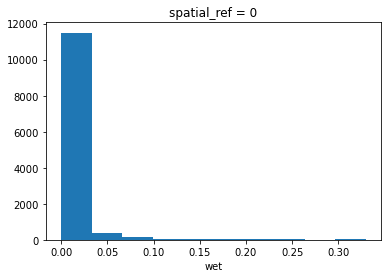

In [3]:
season_xr['wet'].plot()

In [4]:
mean_wet

array(0.00973936)